### ****Anomaly Detection in Optical Fiber Attenuation Data****

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Reading Excel file
df = pd.read_excel('/content/drive/MyDrive/Data Science/OTDR Atten.xlsx')

In [ ]:
df.head()

,Spool ID,OTDR-AttenuationAverage1310,OTDR-AttenuationAverage1383,OTDR-AttenuationAverage1550,OTDR-AttenuationAverage1625,OTDR-AttenuationBottom1310,OTDR-AttenuationBottom1383,OTDR-AttenuationBottom1550,OTDR-AttenuationBottom1625,OTDR-AttenuationTop1310,OTDR-AttenuationTop1383,OTDR-AttenuationTop1550,OTDR-AttenuationTop1625,anamoly
0,ES1F110297,0.327,0.282,0.186,0.196,0.327,0.283,0.186,0.197,0.326,0.282,0.186,0.196,1
1,ES1F110303,0.327,0.277,0.186,0.197,0.327,0.277,0.186,0.197,0.327,0.277,0.186,0.197,1
2,ES1F110573,0.326,0.273,0.185,0.197,0.326,0.274,0.185,0.197,0.326,0.273,0.185,0.197,1
3,ES1F110908,0.325,0.280,0.186,0.199,0.325,0.280,0.186,0.199,0.325,0.280,0.186,0.199,1
4,ES1F110986,0.327,0.274,0.185,0.196,0.327,0.274,0.185,0.196,0.327,0.274,0.185,0.196,1


In [ ]:
# Data Preprocessing: Checking for any Null value
print(df.isnull().sum())


Spool ID                       0
OTDR-AttenuationAverage1310    0
OTDR-AttenuationAverage1383    0
OTDR-AttenuationAverage1550    0
OTDR-AttenuationAverage1625    0
OTDR-AttenuationBottom1310     0
OTDR-AttenuationBottom1383     0
OTDR-AttenuationBottom1550     0
OTDR-AttenuationBottom1625     0
OTDR-AttenuationTop1310        0
OTDR-AttenuationTop1383        0
OTDR-AttenuationTop1550        0
OTDR-AttenuationTop1625        0
anamoly                        0
dtype: int64


In [ ]:
# Data Preprocessing: Dropping all rows with Null values
df = df.dropna()
print(df.isnull().sum())

Spool ID                       0
OTDR-AttenuationAverage1310    0
OTDR-AttenuationAverage1383    0
OTDR-AttenuationAverage1550    0
OTDR-AttenuationAverage1625    0
OTDR-AttenuationBottom1310     0
OTDR-AttenuationBottom1383     0
OTDR-AttenuationBottom1550     0
OTDR-AttenuationBottom1625     0
OTDR-AttenuationTop1310        0
OTDR-AttenuationTop1383        0
OTDR-AttenuationTop1550        0
OTDR-AttenuationTop1625        0
anamoly                        0
dtype: int64


In [ ]:
# Finding all feature names
print(df.columns)

Index(['Spool ID', 'OTDR-AttenuationAverage1310',
       'OTDR-AttenuationAverage1383', 'OTDR-AttenuationAverage1550',
       'OTDR-AttenuationAverage1625', 'OTDR-AttenuationBottom1310',
       'OTDR-AttenuationBottom1383', 'OTDR-AttenuationBottom1550',
       'OTDR-AttenuationBottom1625', 'OTDR-AttenuationTop1310',
       'OTDR-AttenuationTop1383', 'OTDR-AttenuationTop1550',
       'OTDR-AttenuationTop1625', 'anamoly'],
      dtype='object')


In [ ]:
# Excluding non-numeric columns from Correlation
numeric_df = df.drop(columns=[
    'Spool ID',
    'OTDR-AttenuationAverage1310',
    'OTDR-AttenuationAverage1550',
    'OTDR-AttenuationAverage1625',
    'OTDR-AttenuationAverage1383'
  ])


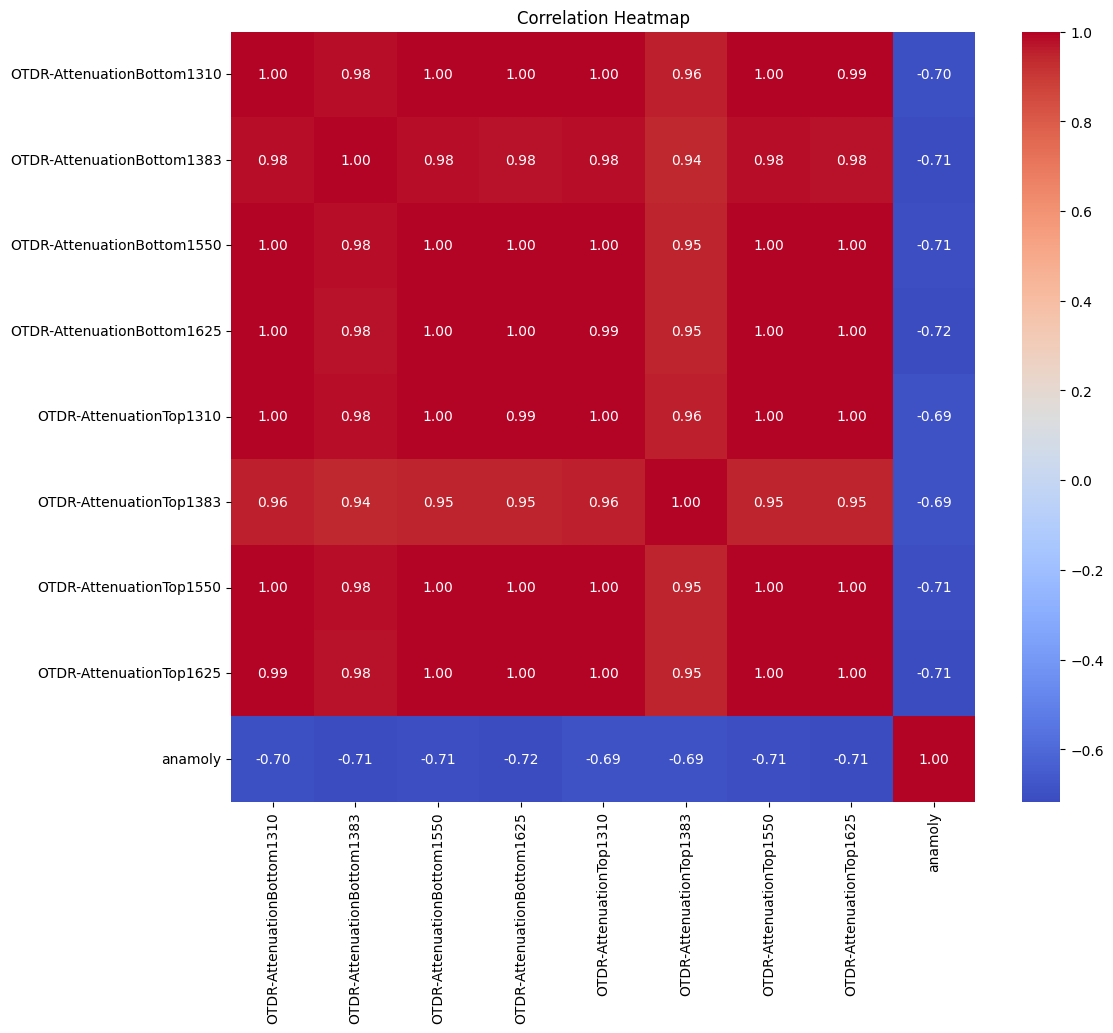

In [ ]:
# Correlation Matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

**Isolation Forest Model for Anomaly Detection in Optical Fiber Attenuation Data**

In [ ]:
# MOdel Training: IsolationForest Model
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(scaled_data)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
# Predict anomalies (1 for normal, -1 for anomaly)
predictions = model.predict(scaled_data)
df = df.drop(columns=['anomaly'])

# Adding Prediction Column to the dataframe.
df['Anomaly'] = predictions

In [ ]:
#exporting Excel
df.to_excel('/content/drive/MyDrive/Data Science/OTDR Atten1.xlsx', index=False)

**Visualization of Attenuation Across Wavelengths with Anomalies Highlighted**

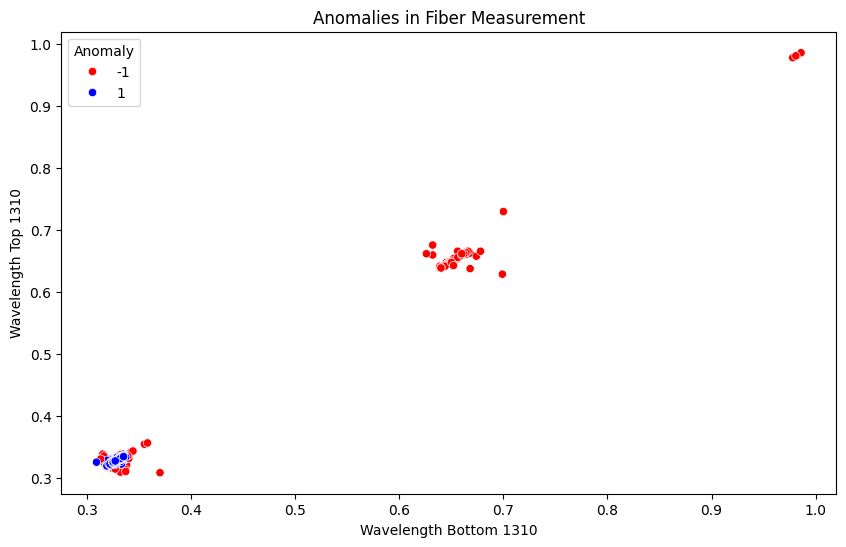

In [ ]:
# ScatterPlot @ 1310nm
from seaborn import violinplot, scatterplot, boxplot
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OTDR-AttenuationBottom1310', y='OTDR-AttenuationTop1310', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomalies in Fiber Measurement')
plt.xlabel('Wavelength Bottom 1310')
plt.ylabel('Wavelength Top 1310')
plt.show()



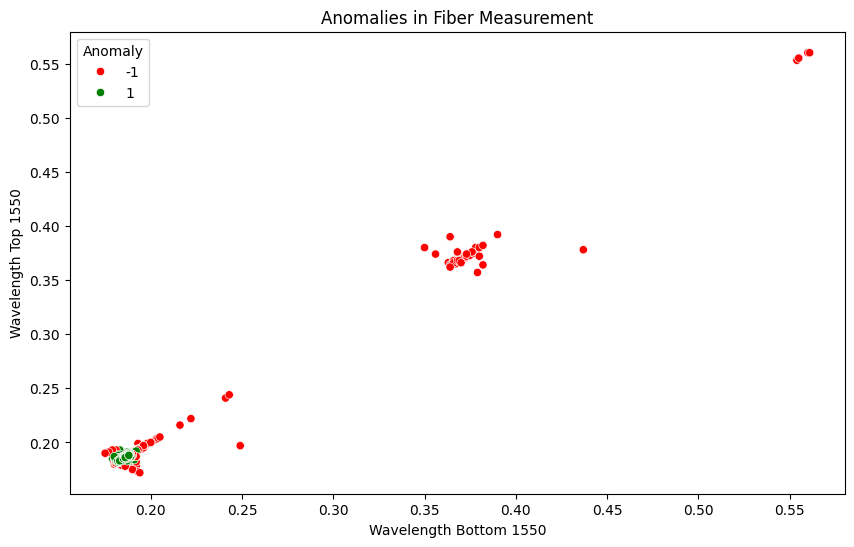

In [ ]:
# ScatterPlot @ 1550nm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OTDR-AttenuationBottom1550', y='OTDR-AttenuationTop1550', hue='Anomaly', palette={1: 'Green', -1: 'red'})
plt.title('Anomalies in Fiber Measurement')
plt.xlabel('Wavelength Bottom 1550')
plt.ylabel('Wavelength Top 1550')
plt.show()

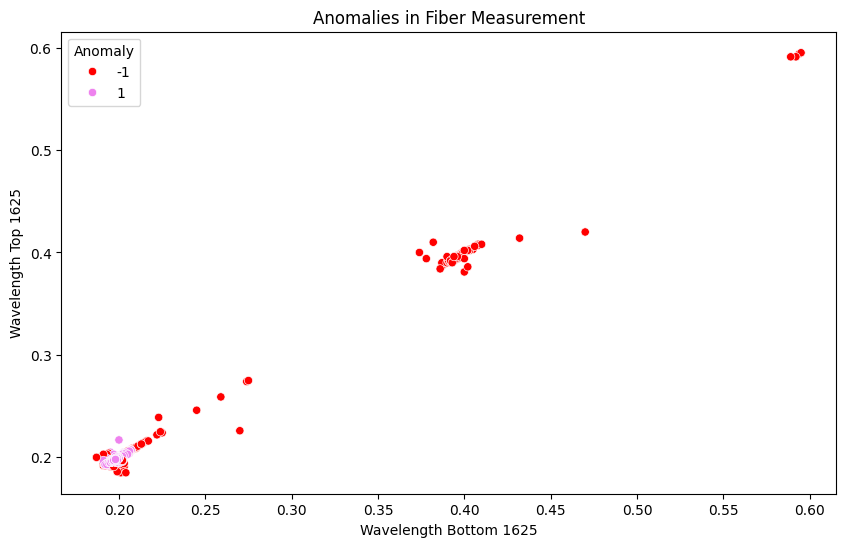

In [ ]:
# ScatterPlot @ 1625nm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OTDR-AttenuationBottom1625', y='OTDR-AttenuationTop1625', hue='Anomaly', palette={1: 'Violet', -1: 'red'})
plt.title('Anomalies in Fiber Measurement')
plt.xlabel('Wavelength Bottom 1625')
plt.ylabel('Wavelength Top 1625')
plt.show()

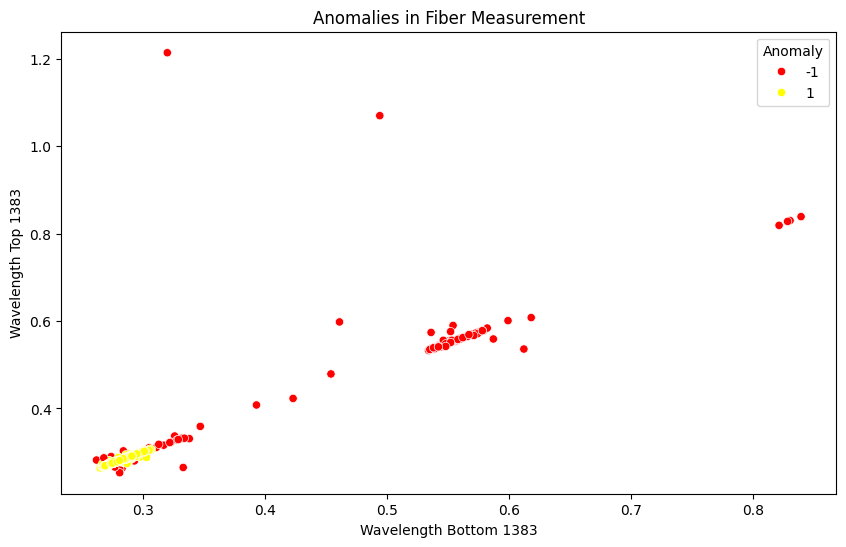

In [ ]:
# ScatterPlot @ 1383nm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OTDR-AttenuationBottom1383', y='OTDR-AttenuationTop1383', hue='Anomaly', palette={1: 'Yellow', -1: 'red'})
plt.title('Anomalies in Fiber Measurement')
plt.xlabel('Wavelength Bottom 1383')
plt.ylabel('Wavelength Top 1383')
plt.show()

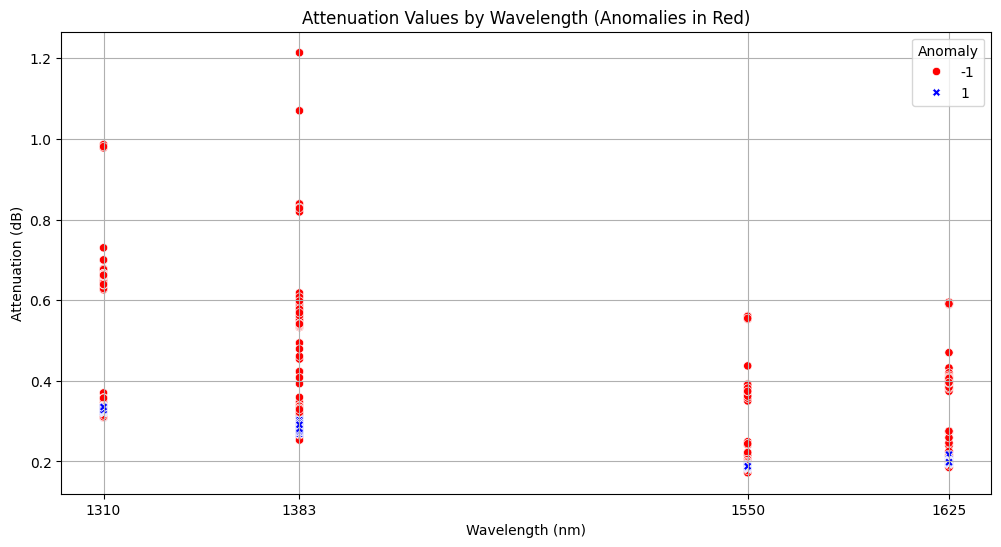

In [ ]:
# Melting the DataFrame to a long format for plotting
df_melted = df.melt(id_vars=['Spool ID', 'Anomaly'],
                    value_vars=['OTDR-AttenuationBottom1310', 'OTDR-AttenuationBottom1383',
                                'OTDR-AttenuationBottom1550', 'OTDR-AttenuationBottom1625',
                                'OTDR-AttenuationTop1310', 'OTDR-AttenuationTop1383',
                                'OTDR-AttenuationTop1550', 'OTDR-AttenuationTop1625'],
                    var_name='wavelength',
                    value_name='attenuation')

# Cleaning up wavelength names to just the numerical value
df_melted['wavelength'] = df_melted['wavelength'].str.extract('(\d+)').astype(int)

# Ploting the attenuation values by wavelength
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_melted, x='wavelength', y='attenuation',
                hue='Anomaly', palette={1: 'blue', -1: 'red'}, style='Anomaly')

# Customize plot labels and title
plt.title('Attenuation Values by Wavelength (Anomalies in Red)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Attenuation (dB)')
plt.xticks([1310, 1383, 1550, 1625])
plt.legend(title='Anomaly', loc='upper right')
plt.grid(True)
plt.show()


### **------END------**
